###### Davi Dom Bosco, Bruno Sanches, Guilherme Roccato

# Projeto 3 - Ciência dos Dados

### Tema:
Tinder - Aplicativo de relacionamentos

### Pergunta a ser respondida:
É possível prever se um usuário do aplicativo dará like ou não em uma pretendente com base em suas  preferências antecipadamente demonstradas?


### Contextualização

No mundo em que vivemos onde o tempo é precioso, ferramentas que executam tarefas do dia-a-dia de maneira mais rápidas são muito valiosas, o WhatsApp por exemplo, torna a comunicação um processo instantâneo. Por sua vez, nosso objeto de estudo, o Tinder, tenta tornar instântaneo o processo de buscas por relacionamentos amorosos. Tendo em vista a maneira que esse aplicativo de encontros funciona, identificamos que o tempo dedicado a escolha de Likes ou Dislikes dos perfis de possíveis pretendentes é a fase que utiliza mais tempo do usuário e segundo um estudo (Imagem abaixo), influencia diretamente a quantidade de Likes reciprocos (Match). 

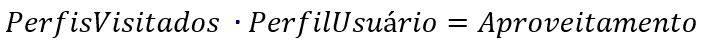

A equação na imagem nos diz que o aproveitamento está diretamente ligado ao número de perfis visitados e ao perfil do usuário, ou seja usuários com perfis muito bons, mas que não  visitam perfis de outros usuários, e vice-versa, não terão likes reciprocos. Visando resolver esse problema, o projeto em questão tem o intuito de alavancar de forma automatizada o aproveitamento do usuário com um aumento do número de perfis visitados, prevendo a quais perfis o usuário terá ou não interesse por conta própria. Isso ocorreria utilizando uma pequena quantidade de imagens para determinar o tipo de pessoa pela qual o usuário se interessa, fazendo com que ele tenha que dedicar menos tempo ao aplicativo.

### Análise do DataSet e Metodologia

Primeiramente, tínhamos em mãos um dataset composto por imagens provenientes de perfis de mulheres encontradas no aplicativo Tinder, tais imagens foram obtidas em https://www.kaggle.com/chrisroths/peoples-republic-of-tinder-1#ladies1.zip).

Ao todo, 849 imagens brutas estavam presentes no dataset. Tais imagens possuiam distintas colorações, dimensões e proporções entre a pessoa exibida e o cenário por trás da foto. No entanto, como decidimos utilizar métodos de clusterização para segmentar nossos dados em grupos que pussuíssem características semelhantes - nos possibilitando assim a detectação de padrões de comportamento do usuário frente a cada grupo - tivemos preliminarmente que realizar uma limpeza no dataframe, o que acabou por reduzir os dados que realmente poderiam ser utilizáveis. 

Sendo assim, o presente projeto é pautado basicamente em grandes três etapas. A príncipio, faz-se necessário adequar as imagens para que, o dataframe seja suficientemente homogêneo a fim de gerar resultados plausíveis. A segunda etapa consiste em encontrar a ferramenta de clusterização que gere grupos marcados por características visivelmente similares, e em sua respectiva atribuição à cada imagem, para fins de iteração. Por fim, pretende-se criar uma interface amigável para que o usuário final possa utilizar o programa sem necessidade de possuir conhecimento prévio sequer em programação ou ciência dos dados.

## I. Limpeza dos Dados

###### Importação de bibliotecas 

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import pandas as pd

from sklearn.cluster import KMeans

###### Descrição dos métodos

Para ser possível comparar imagens e constatar semelhanças, faz-se necessário identificar o rosto presente em cada foto, enquadrando cada qual em uma nova imagem e o atribuindo a uma nova matriz contendo os níveis de intensidade de cada pixel da imagem. Também para tornar o processo legítimo, convertemos estes novos recortes a uma escala de cinza, para que aspectos de coloração não influenciem o programa. Em meio a este processo, também preparamos o terreno para a fase de clusterização, concatenando as matrizes (reduzindo a duas dimensãos as matrizes que antes apresentavam formato 3D).

O método utilizado para realizar a identificação de traços e consequente enquadramento de rostos foi o OpenCv, biblioteca qual possui funções como a "detectMultiScale", capaz de detecar olhos humanos em imagens, e posteriormente traçar uma área que corresponda à face que comporta tais olhos.

Tomamos, ao longo da elaboração do código, os devidos cuidados para que todas as imagens fossem salvas no mesmo formato e dimensões, para que futuramente a comparação de matrizes seja eficaz.

###### Exemplo prático

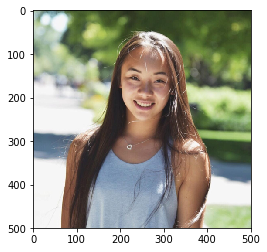

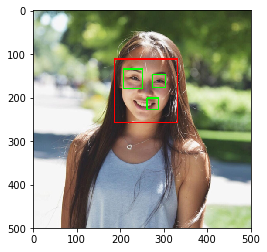

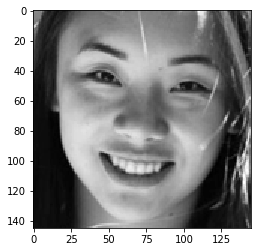

In [2]:
img_folder_path = 'exemplo/'
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']

faces = []
zoom = []
size = 100,100
numero=np.arange(0,1000,1)

for img in imgPaths:
    img = cv2.imread(img)
    
    face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier('utils/haarcascade_eye.xml')
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    detected_faces = face_cascade.detectMultiScale(gray)
    
    for(x, y, w, h) in detected_faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) > 1:
            faces.append(np.array(roi_color))
            
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

            plt.imshow(img)
            plt.show()
            
        for i, face in enumerate(faces):
            gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)    
            plt.imshow(gray, CMAP="gray")
            plt.show()
            img = Image.fromarray(gray)
            img.thumbnail(size)
            matriz=np.array(img)
            zoom.append(matriz)


###### Aplicação no Dataset completo

In [3]:
img_folder_path = 'img/'
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']

faces = []
zoom = []
matrix= []
matrix500 = []
sobraram =[]

size = 100,100
size2= 500,500
contador=0

for imagem in (imgPaths):
    
    img = cv2.imread(imagem)  
    face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier('utils/haarcascade_eye.xml')
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    detected_faces = face_cascade.detectMultiScale(gray) 
    
    for(x, y, w, h) in detected_faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) > 1:
            faces.append(np.array(roi_color))
            ultima= faces[len(faces)-1]
            gray = cv2.cvtColor(ultima, cv2.COLOR_RGB2GRAY) 
            foto = Image.fromarray(gray)
            foto.thumbnail(size)
            matriz=np.array(foto)
            zoom.append(matriz)
            
            a = zoom[len(zoom)-1]
            b = np.concatenate(a)
            
            fotooriginal = Image.fromarray(img1)
            fotooriginal.thumbnail(size2)
            matriz2=np.array(fotooriginal)
            matrix500.append(matriz2)
            
            c = matrix500[len(matrix500)-1]
            d = np.concatenate(c)
            
            if len(b)==10000 and len(d) == 250000:
                
                foto.save('rostos\{}.png'.format(contador)) 
                fotooriginal = Image.fromarray(img1)
                fotooriginal.thumbnail(size2)
                fotooriginal.save('img_utilizaveis\{}.png'.format(contador))
                matrix.append(b)
                sobraram.append(d)
                contador+=1

###### Pré-classificação para futuras análises de acuracia

Como estamos trabalhando com clusterização, ao final da segmentação de dados, precisaremos de um meio capaz de deduzir se o processo tem ou não embasamento prático. Logo, antes de escolhermos qual método melhor divide as imagens, pedimos para que um integrante de nosso grupo classificasse todas as imagens presentes no dataset já devidamente limpo. Tal classificação se deu da seguinte forma:
* Like - representa as garotas cuja foto lhe chamaram a atenção,
* Dislike - conjunto de imagens que não atrairam a atenção do usuário.

E então, guardamos essas informações em uma tabela.

In [17]:
tabela = pd.read_excel('Classificação P3.xlsx')

tabela = tabela.set_index('Fotos')

tabela.Like = tabela.Like.astype('category')
tabela.Like.cat.categories = ('Dislike', 'Like')

tabela.head()

,Like
Fotos,
0,Like
1,Like
2,Like
3,Like
4,Like


## II. Clusterização

### Teste 1 - KMeans

O algoritmo de clusterização Kmeans tenta criar um número pré-determinado de clusters a partir de um dataset não rotulado. Para tal, ele usa dois conceitos primordiais que tentam otimizar o formato que um determinado cluster deve possuir, sendo eles:

* O 'centro do cluster', que nada mais é do que a média aritmética de todos os pontos que pertencem ao grupo.
* A noção de que cada estará mais perto do centro de seu corresponte cluster, do que do centro de clusters alheios.

Essas duas suposições guiam toda a caixa preta por trás do kmeans. Para separar nosso próprio conjunto de imagens em diferentes grupos, primeiro dissemos ao métódo que queríamos que ele criasse 15 clusters contendo imagens "similares", e em seguida, entregamos a ele nosso dataset, no formato de uma matriz bidimensional.

In [5]:
kmeans = KMeans(n_clusters=15).fit(matrix)

###### Exibindo resultados

In [6]:
listakmeans = kmeans.labels_.tolist()
img_folder_path = 'rostos/'
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']

       
def mostrar2(listageral,cluster,quantidade,linha,nlinhas):
    lista=[]
    
    for i,imagem in enumerate(imgPaths):
        img = cv2.imread(imagem)  
        foto = Image.fromarray(img)
        
        if listageral[i]==cluster:
            lista.append(foto)
            
    contador=1
    while contador<=quantidade:
        plt.subplots_adjust(left=None, bottom=None, right=2, top=5, wspace=0, hspace=0.2)
        plt.subplot(nlinhas,quantidade,(linha*quantidade)+contador)
        plt.imshow(lista[contador-1])
        contador+=1
        
def mostrar(listageral,cluster,quantidade):
    mostrar2(listageral,cluster,quantidade,1,quantidade)

Cada linha exibida abaixo representa uma pequena demonstração dos clusters que foram determinados pelo método de clusterização Kmeans.

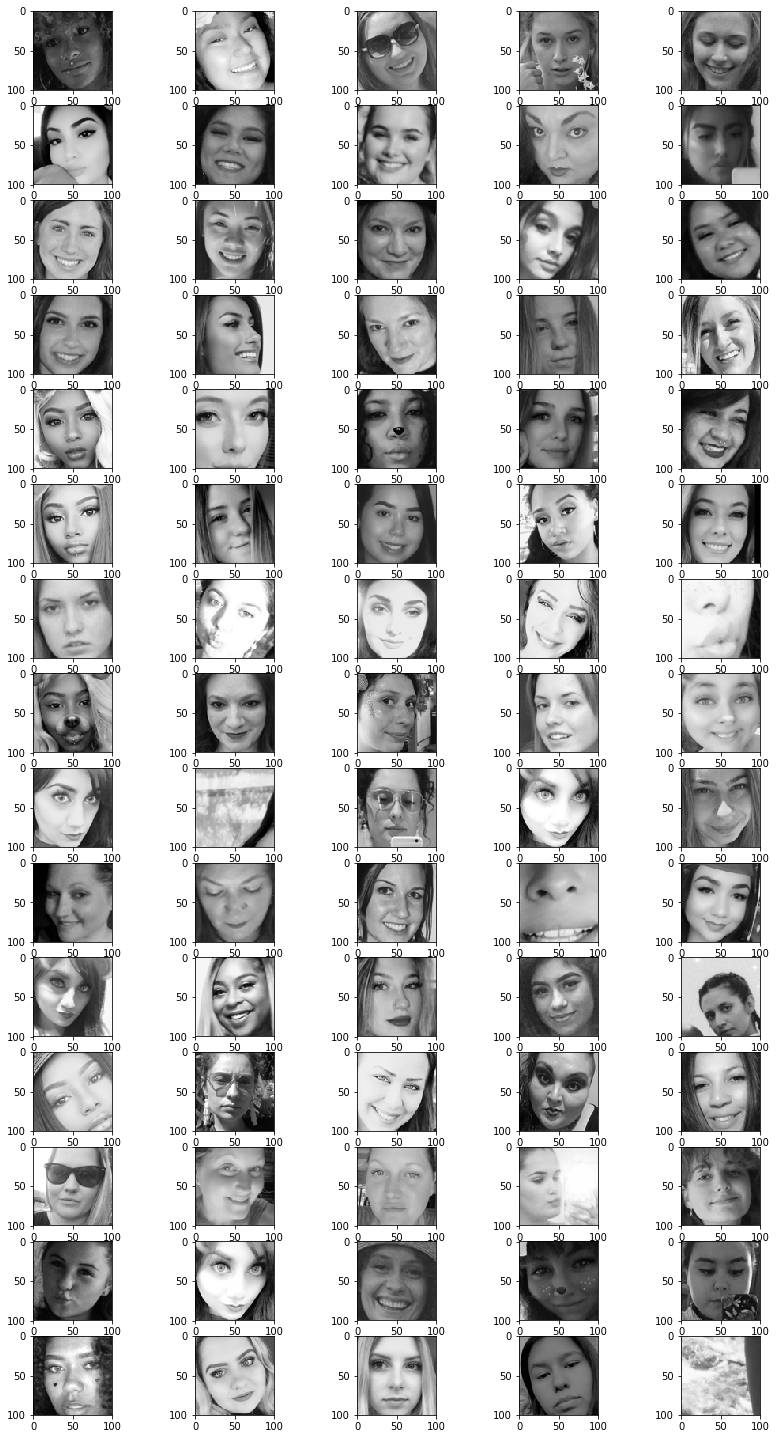

In [7]:
for i in range(15):
    mostrar2(listakmeans,i,5,i,15)

###### Atrelando os clusters gerados às suas correspondentes fotos

In [18]:
lista = kmeans.labels_.tolist()

tabela.insert(loc=0, column='Matriz', value=matrix)
tabela.insert(loc=0, column='Kmeans', value=lista)

tabela.Kmeans = tabela.Kmeans.astype('category')
indices=[]
for i in np.arange(1,16):
    indices.append('Grupo{}'.format(i))
tabela.Kmeans.cat.categories = (indices)

tabela.head()

,Kmeans,Matriz,Like
Fotos,,,
0,Grupo4,"[50, 64, 74, 76, 76, 68, 50, 48, 51, 47, 38, 2...",Like
1,Grupo3,"[18, 49, 65, 69, 101, 100, 86, 70, 71, 57, 78,...",Like
2,Grupo4,"[250, 251, 243, 203, 185, 173, 164, 165, 166, ...",Like
3,Grupo10,"[194, 205, 196, 186, 162, 149, 182, 195, 196, ...",Like
4,Grupo13,"[62, 63, 67, 71, 68, 69, 69, 70, 85, 106, 109,...",Like


### Teste 2 - Spectral clustering

Em geral, o Spectral Clustering é um método muito útil quando a estrutura dos clusters é altamente não-convexa, ou então quando a medida de seus centros e dispersões acerca destes não são capazes de representar os clusters de maneira fidedígna. Um exemplo claro exemplo é quando clusters se aglomeram no formato de círculos no plano bidimensional. 

Ao aplicarmos este ferramental ao nosso conjunto de imagens obtivemos o seguinte resultado.

In [11]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=15,assign_labels="discretize",random_state=0)
sc.fit(matrix)  
listaSC = sc.labels_.tolist()

C:\Users\david\.anaconda\anaconda_tentativa_2\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Cada linha exibida abaixo representa uma parcela de cada cluster que foi determinados pelo método Spectral Clustering. Estamos exibindo apenas duas fotos por grupo, pois um dos clusters que foi gerado pelo Spectral possui apenas duas imagens. No entanto, no momento da averiguação da adequação dos clusters, todas as imagens foram devidamente  analisadas.

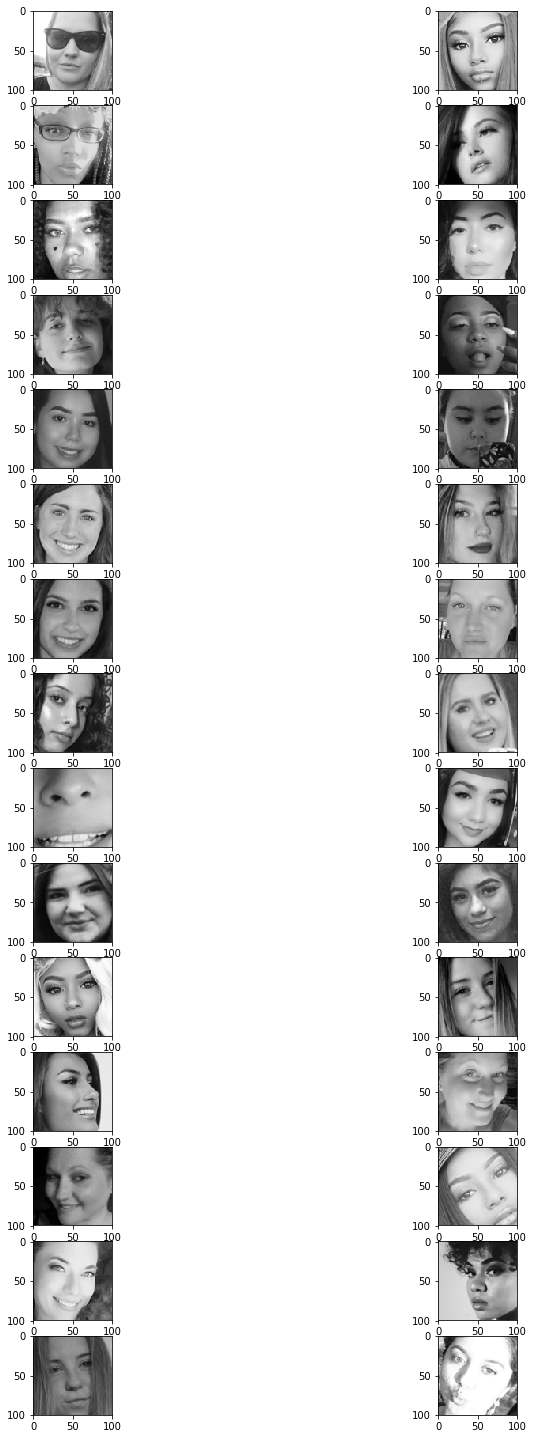

In [12]:
for i in range(15):
    mostrar2(listaSC,i,2,i,15)

###### Atrelando os clusters gerados às suas correspondentes fotos

In [19]:
lista2 = sc.labels_.tolist()

tabela.insert(loc=0, column='SpectralClustering', value=lista2)
#tabela.SpectralClustering = lista2

tabela.SpectralClustering = tabela.SpectralClustering.astype('category')

indices=[]
for i in np.arange(1,16):
    indices.append('Grupo{}'.format(i))
    
tabela.SpectralClustering.cat.categories = (indices)

#Salvando a tabela final em um arquivo excel

writer = pd.ExcelWriter('Projeto3.xlsx')
tabela.to_excel(writer,'Sheet1')
writer.save()

In [21]:
tabela.head(10)

,SpectralClustering,Kmeans,Matriz,Like
Fotos,,,,
0,Grupo7,Grupo4,"[50, 64, 74, 76, 76, 68, 50, 48, 51, 47, 38, 2...",Like
1,Grupo6,Grupo3,"[18, 49, 65, 69, 101, 100, 86, 70, 71, 57, 78,...",Like
2,Grupo12,Grupo4,"[250, 251, 243, 203, 185, 173, 164, 165, 166, ...",Like
3,Grupo13,Grupo10,"[194, 205, 196, 186, 162, 149, 182, 195, 196, ...",Like
4,Grupo1,Grupo13,"[62, 63, 67, 71, 68, 69, 69, 70, 85, 106, 109,...",Like
5,Grupo12,Grupo13,"[86, 83, 86, 88, 83, 83, 82, 81, 87, 92, 88, 7...",Like
6,Grupo7,Grupo13,"[17, 21, 22, 20, 16, 11, 10, 17, 34, 61, 90, 1...",Like
7,Grupo13,Grupo12,"[59, 58, 57, 56, 57, 58, 59, 63, 59, 52, 47, 4...",Like
8,Grupo11,Grupo5,"[218, 234, 236, 235, 230, 226, 225, 213, 190, ...",Like


## III. Aplicação

Afim de facilitarmos a aplicação do processo, resolvemos apresentar uma interface interativa para os usuários - criada por meio da biblioteca Pygame aliada ao Pandas. Utilizando as imagens já clusterizadas, inicialmente apresentamos 15 delas (cada uma pertencendo a um grupo do cluster) para serem classificadas pelo usuário conforme seus gostos pessoais (like ou dislike). Em seguida, o programa executa a classificação das imagens restantes de forma automatizada, baseando-se nos likes dados aos clusters previamente existentes. 

Tal programa pode ser encontrado na mesma pasta que a do atual relatório, no GitHub.

Uma vez tendo em mãos esta aplicação, utilizamos as classificações que um integrante de nosso grupo havia previamente estabelecido (para as 15 imagens imagens inciais que o programa demanda), para assim testar a eficácia do programa. Conforme, o programa automaticamente previa se ele daria like ou não no conjunto de fotos, uma lista (que pode ser encontrada no código abaixo como 'classificadas') contendo as respectivas rotulações foi retornada.

Utilizando então a comparação entre os rótulos atribuídos pelo usuário em questão, e os previstos pelo 'aplicativo', calculamos então sua acurácia relativa.

In [23]:
classificadas=['dislike', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'dislike', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'like', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'dislike', 'like', 'like', 'like', 'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'dislike', 'like', 'dislike', 'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'like', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'like', 'like', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'like', 'like', 'dislike', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'like', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'like', 'dislike', 'like', 'like', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'like', 'dislike', 'like', 'dislike', 'like', 'dislike', 'like', 'dislike', 'dislike', 'like', 'dislike', 'like', 'dislike', 'like', 'like', 'dislike', 'dislike', 'like', 'like', 'like', 'dislike', 'like', 'like', 'like']

tabela.insert(loc=0, column='Classificadas', value=classificadas)
              
tabela.Classificadas = tabela.Classificadas.astype('category')
tabela.Classificadas.cat.categories = ('Dislike','Like')

tabela.head(10)

,Classificadas,SpectralClustering,Kmeans,Matriz,Like
Fotos,,,,,
0,Dislike,Grupo7,Grupo4,"[50, 64, 74, 76, 76, 68, 50, 48, 51, 47, 38, 2...",Like
1,Dislike,Grupo6,Grupo3,"[18, 49, 65, 69, 101, 100, 86, 70, 71, 57, 78,...",Like
2,Dislike,Grupo12,Grupo4,"[250, 251, 243, 203, 185, 173, 164, 165, 166, ...",Like
3,Like,Grupo13,Grupo10,"[194, 205, 196, 186, 162, 149, 182, 195, 196, ...",Like
4,Like,Grupo1,Grupo13,"[62, 63, 67, 71, 68, 69, 69, 70, 85, 106, 109,...",Like
5,Dislike,Grupo12,Grupo13,"[86, 83, 86, 88, 83, 83, 82, 81, 87, 92, 88, 7...",Like
6,Dislike,Grupo7,Grupo13,"[17, 21, 22, 20, 16, 11, 10, 17, 34, 61, 90, 1...",Like
7,Like,Grupo13,Grupo12,"[59, 58, 57, 56, 57, 58, 59, 63, 59, 52, 47, 4...",Like
8,Like,Grupo11,Grupo5,"[218, 234, 236, 235, 230, 226, 225, 213, 190, ...",Like


In [24]:
likesiguais = tabela[(tabela.Like == 'Like') & (tabela.Classificadas == 'Like')]
dislikesiguais = tabela[(tabela.Like=='Dislike') & (tabela.Classificadas == 'Dislike')]
print ("Acurácia: ",((len(likesiguais)+len(dislikesiguais))/len(tabela))*100, "%")

Acurácia:  52.94117647058824 %


Aplicando nosso programa a um integrante de nosso grupo, estes foram as porcentagens de erros tipo I e II obtidos.


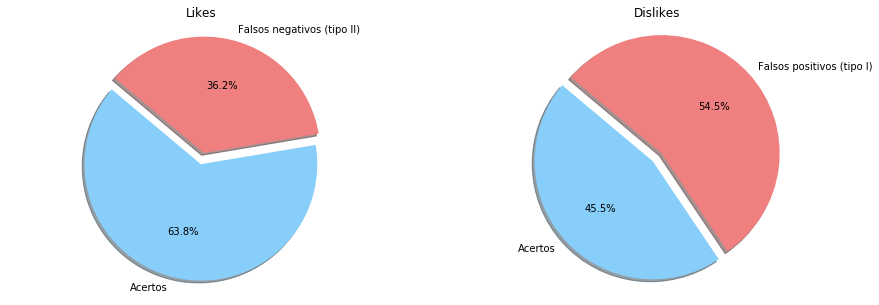

In [25]:
labels = 'Acertos', 'Falsos negativos (tipo II)'
labels2 = 'Acertos', 'Falsos positivos (tipo I)'
likes = tabela[tabela.Like == 'Like']
dislikes = tabela[(tabela.Like == 'Dislike')]
         
a=(len(likesiguais)/len(likes))*100
b=(len(dislikesiguais)/len(dislikes))*100
porcentagensLike = [a, 100-a]
porcentagensDislike = [b, 100-b]

colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 

print('Aplicando nosso programa a um integrante de nosso grupo, estes foram as porcentagens de erros tipo I e II obtidos.')

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.pie(porcentagensLike, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Likes")

plt.subplot(122)
plt.pie(porcentagensDislike, explode=explode, labels=labels2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Dislikes")
plt.show()

## Conclusão

O programa que desenvolvemos ao longo deste projeto encontra-se altamente funcional e simula com fidelidade a experiência otimizada de um usuário de Tinder. No entanto, os clusters que alimentam o aplicativo ainda estão suscetíveis a melhorias.

Considerando os resultados obtidos pela aplicação prática de nosso projeto, podemos constatar que para responder a questão inicial de nosso projeto, isto é, se seria possível prever se um usuário do aplicativo daria like ou não em uma pretendente com base em suas preferências antecipadamente demonstradas, técnicas mais profundas de clusterização são necessárias.

Embora a técnica por nós utilizada na divisão de grupos semelhantes - Spectral Clustering - separe, de maneira razoável as imagens de acordo com seus padrões de aglomeração de pixels, pudemos constatar que, tratando as imagens de rostos humanos, simplesmente analisar a intensidade de pixels, mesmo que convertidos para uma escala de cinza, não é suficiente para uma efetiva classificação. Tal fato ocorre pois, no fim das contas, o processo de atração em aplicativos de relacionamento vai muito além da análise isolada dos pixels de um perfil.

Para futuras iterações, deve-se considerar um processo de clusterização que seja capaz de levar em conta em sua segmentção os traços, feições e proporções das faces analisadas. 

###### Referências

https://towardsdatascience.com/m2m-day-89-how-i-used-artificial-intelligence-to-automate-tinder-ced91b947e53